In [8]:
%load_ext autoreload
%autoreload 2
import numpy as np
from hamiltonians.utils.graph_utils import create_random_weighted_graph
from hamiltonians.problems import MaxCutProblem
from hamiltonians.solution_analysis.maxcut import inspect_solution_landscape, plot_solution_landscape

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Defining the graph
Initialize a simple weighted graph where each edge has an initial weight between 0.1 and 1.0. Each edge has two additional parameters, initialized between -1.0 and 1.0 each.

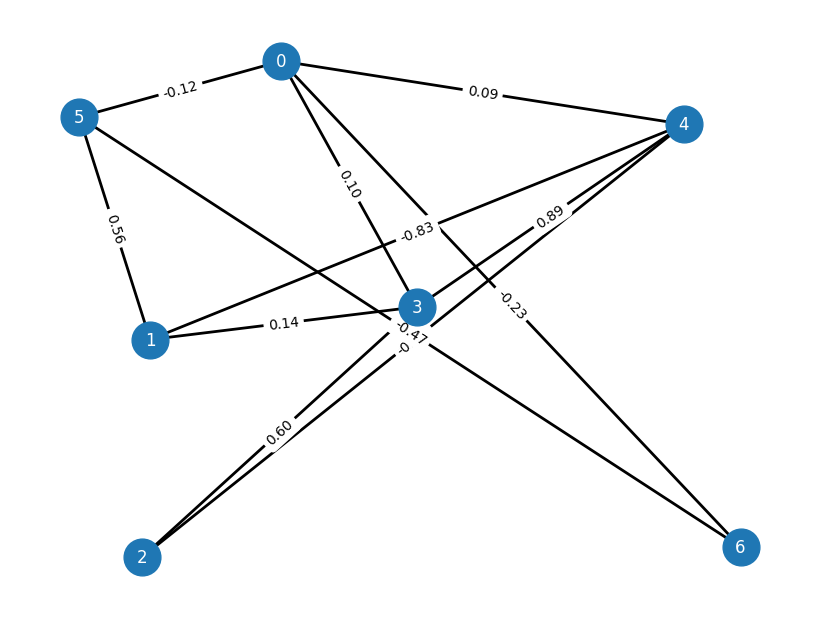

In [9]:
g = create_random_weighted_graph(n_nodes=7, edge_probability=0.6, n_edge_params=2, init_weight_range=(-1.0, 1.0), edge_param_range=(-1.0, 1.0), seed=0)
maxcut = MaxCutProblem(g)
maxcut.visualize_graph()


### Inspecting the Solution Landscape
Instead of modifying the problem configuration for multiple values of the Hamiltonian parameter / Lambda manually, it is more convenient to use the inspect_solution_landscape() function. Through this, one can apply a parameter modifier (such a s a quadratic edge scaling) for a range of values. The inspect_solution_landscape() function then calculates the optimal cut values for each value in the defined interval. In the following example, the parameter "scaling_factor" is the Hamiltonian parameter Lambda.

In [12]:
# 11 equidistant points in the interval [-2.0, 2.0]
scaling_factors = np.linspace(-2.0, 2.0, 11)

landscape_data = inspect_solution_landscape(
    problem=maxcut,
    modifier_name="quadratic_edge_scaling",  # Qubit edge weight modifier function
    param_name="scaling_factor",
    param_values=scaling_factors
)

print(landscape_data)

{'param_values': array([-2. , -1.6, -1.2, -0.8, -0.4,  0. ,  0.4,  0.8,  1.2,  1.6,  2. ]), 'cut_values': [12.186255397457108, 7.833566691322727, 4.5336018875104385, 2.5936245485554736, 1.8327876182366354, 2.269823952613974, 3.530694458646117, 5.679353469381714, 8.365719086858563, 11.589791311076665, 16.031943940607487]}


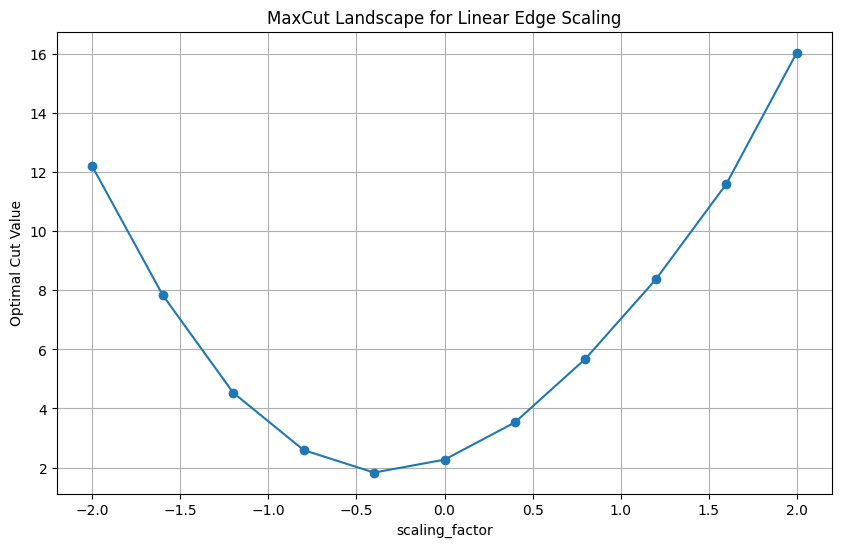

In [13]:
# 3. Plot the solution landscape
plot_solution_landscape(
    landscape_data=landscape_data,
    param_name="scaling_factor",
    title="MaxCut Landscape for Linear Edge Scaling"
)
